#Introduction

The traits encompassed Five Factor Model of personality (Neuroticism (N), Extraversion
(E), Openness to Experience (O), Agreeableness (A), and Conscientiousness (C)) are among the most reliable measures in psychologicy research, in terms of stability of individual responses over time, grouping of individuals into personality types, and association with many psychological phenomena of interest.

This analysis aims to predict individual use of addictive drugs from the above five measures of personality, as well as two other personality measures (impulsivity and sensation seeking) and basic demographic information.

Binary classification conducted on five different addictive substances to predict use within the last decade: Amphetamines, benzodiazepines, cocaine, crack cocaine, and heroin.

Comparitive analysis and hyperparamiter tuning will then focus on two targets in particular - amphetamines (the drug with the most balanced classes) and heroin (the target with the highest class imbalance). For these two targets, logistic regression and random forest but will be compared for their performance




In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Supervised Learning/Supervised Learning Capstone/Drug_Use/Drug_Consumption.csv')
df.drop('ID', axis=1, inplace=True)


Dataset can be found at: https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci?select=Drug_Consumption_Quantified.csv

In [105]:
pd.set_option('display.max_columns', None)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1884 non-null   object 
 1   Gender     1884 non-null   object 
 2   Education  1884 non-null   object 
 3   Country    1884 non-null   object 
 4   Ethnicity  1884 non-null   object 
 5   Nscore     1884 non-null   float64
 6   Escore     1884 non-null   float64
 7   Oscore     1884 non-null   float64
 8   AScore     1884 non-null   float64
 9   Cscore     1884 non-null   float64
 10  Impulsive  1884 non-null   float64
 11  SS         1884 non-null   float64
 12  Alcohol    1884 non-null   object 
 13  Amphet     1884 non-null   object 
 14  Amyl       1884 non-null   object 
 15  Benzos     1884 non-null   object 
 16  Caff       1884 non-null   object 
 17  Cannabis   1884 non-null   object 
 18  Choc       1884 non-null   object 
 19  Coke       1884 non-null   object 
 20  Crack   

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


#Data Cleaning

Rating's for Drug Use:

* CL0: Never Used
* CL1: Used over a Decade Ago
* CL2: Used in Last Decade
* CL3: Used in Last Year
* CL4: Used in Last Month
* CL5: Used in Last Week
* CL6: Used in Last Day

Convert strings to numeric (CL0 = 0, and so on)

In [106]:
drug_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

for col in drug_cols:
  df[col] = df[col].str.replace('CL', '', regex=True).astype(int)

Analysis will focus on drugs with high potential for abuse:
* `Amphet` (amphetamines)
* `Benzos` (benzodiazepines)
* `Coke` (cocaine)
* `Crack` (crack cocaine)
* `Heroin`

note: `Meth` refers to methadone, a low efficacy opioid used in treating opioid use disorder (not methamphetamine - the highly addictive stimulant, contained within the `Amphet` category). Thus it is not included in above list of substances with high abuse potential.

In [107]:
df.drop(['Alcohol', 'Amyl', 'Caff', 'Cannabis', 'Choc',
             'Ecstasy','Ketamine', 'Legalh', 'LSD',
             'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'], axis=1, inplace=True)

Convert target values to binary response:

* 0 = no use in the last year (`Non_user`)
* 1 = used within last decade (`User`)

In [108]:
keys = list(range(7))
vals = [0,1,1,1,1,1,1]
targets_dict = dict(zip(keys, vals))


target_drugs = ['Amphet', 'Benzos', 'Coke', 'Crack', 'Heroin']
for target in target_drugs:
  df[target] = df[target].map(targets_dict)

##Outliers

Data contains 7 numeric features - all pertaining to personality measures:


* Nscore: is NEO-FFI-R Neuroticism
* Escore: is NEO-FFI-R Extraversion
* Oscore: is NEO-FFI-R Openness to experience.
* Ascore: is NEO-FFI-R Agreeableness.
* Cscore: is NEO-FFI-R  Conscientiousness.
* Impulsive: is impulsiveness measured by BIS-11
* SS: is sensation seeing measured by ImpSS

from https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified:

All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued

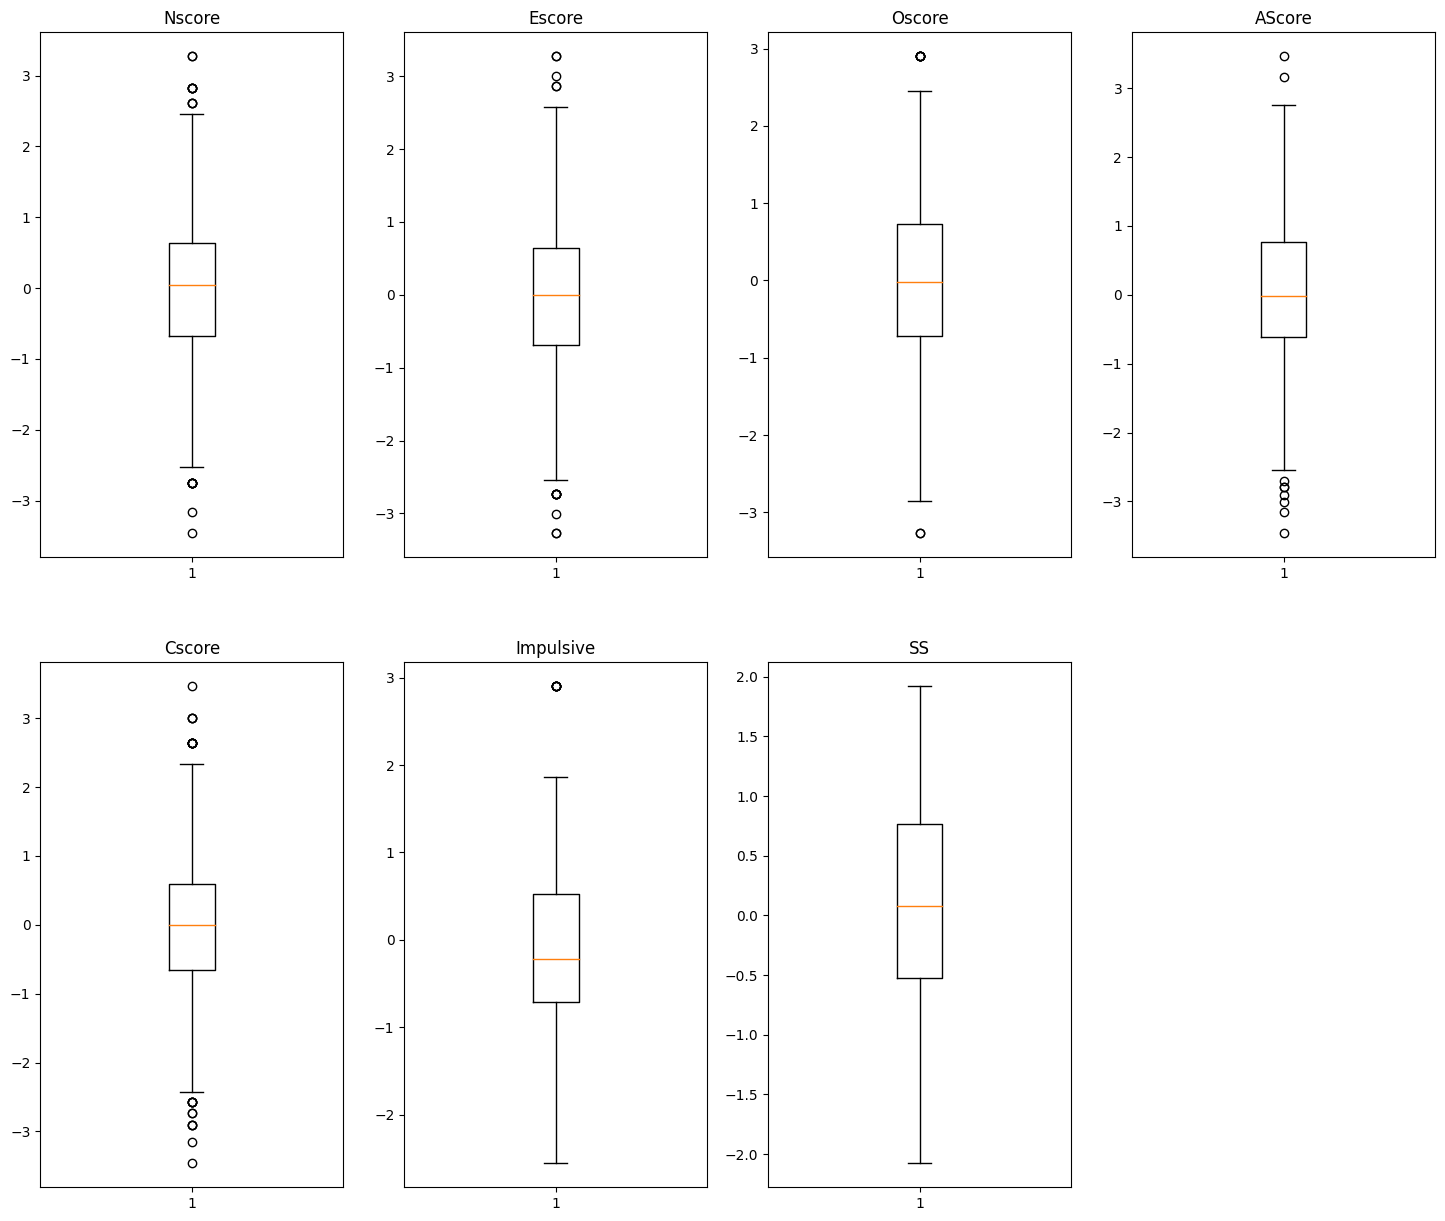

In [109]:
plt.figure(figsize = (18,15))

personality_measures = ['Nscore', 'Escore',	'Oscore',	'AScore',	'Cscore', 'Impulsive', 'SS']
for i in range(len(personality_measures)):
  plt.subplot(2,4,i+1)
  plt.boxplot(df[personality_measures[i]])
  plt.title(personality_measures[i])

plt.show();

In [110]:
from scipy.stats import zscore
zscores = zscore(df[personality_measures])

min = zscores[personality_measures].min().min()
max = zscores[personality_measures].max().max()

print('All personality measures fall within %.2f and %.2f standard deviations of their respective means' % (min, max))


All personality measures fall within -3.47 and 3.47 standard deviations of their respective means


#Univariate Analysis

###Demographic features

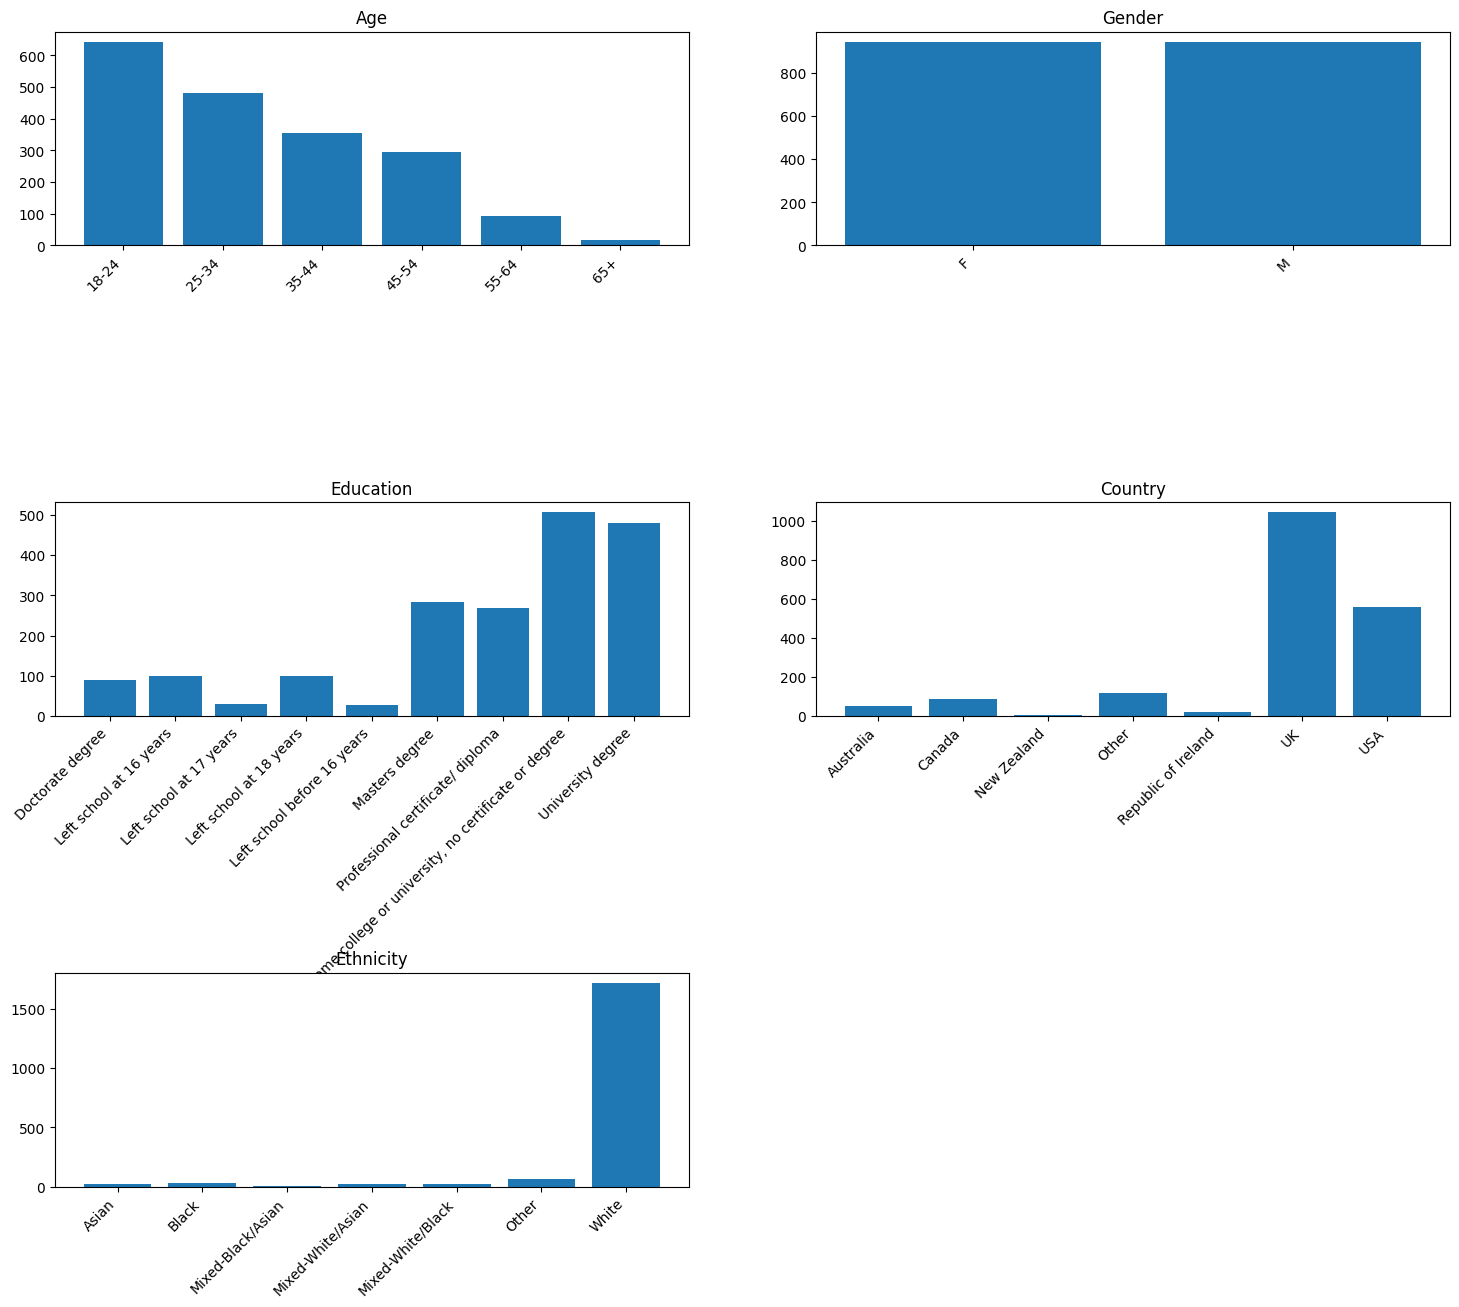

In [111]:
plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=1.2)

demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'] #list of demographic columns
for i in range(len(demographics)):
  var = df.columns[i]
  plt.subplot(3,2,i+1)
  plt.bar(df.groupby(var)[var].count().index,
          df.groupby(var)[var].count())
  plt.xticks(rotation=45, ha='right')
  plt.title(df.columns[i])

plt.show()

###Personality measures

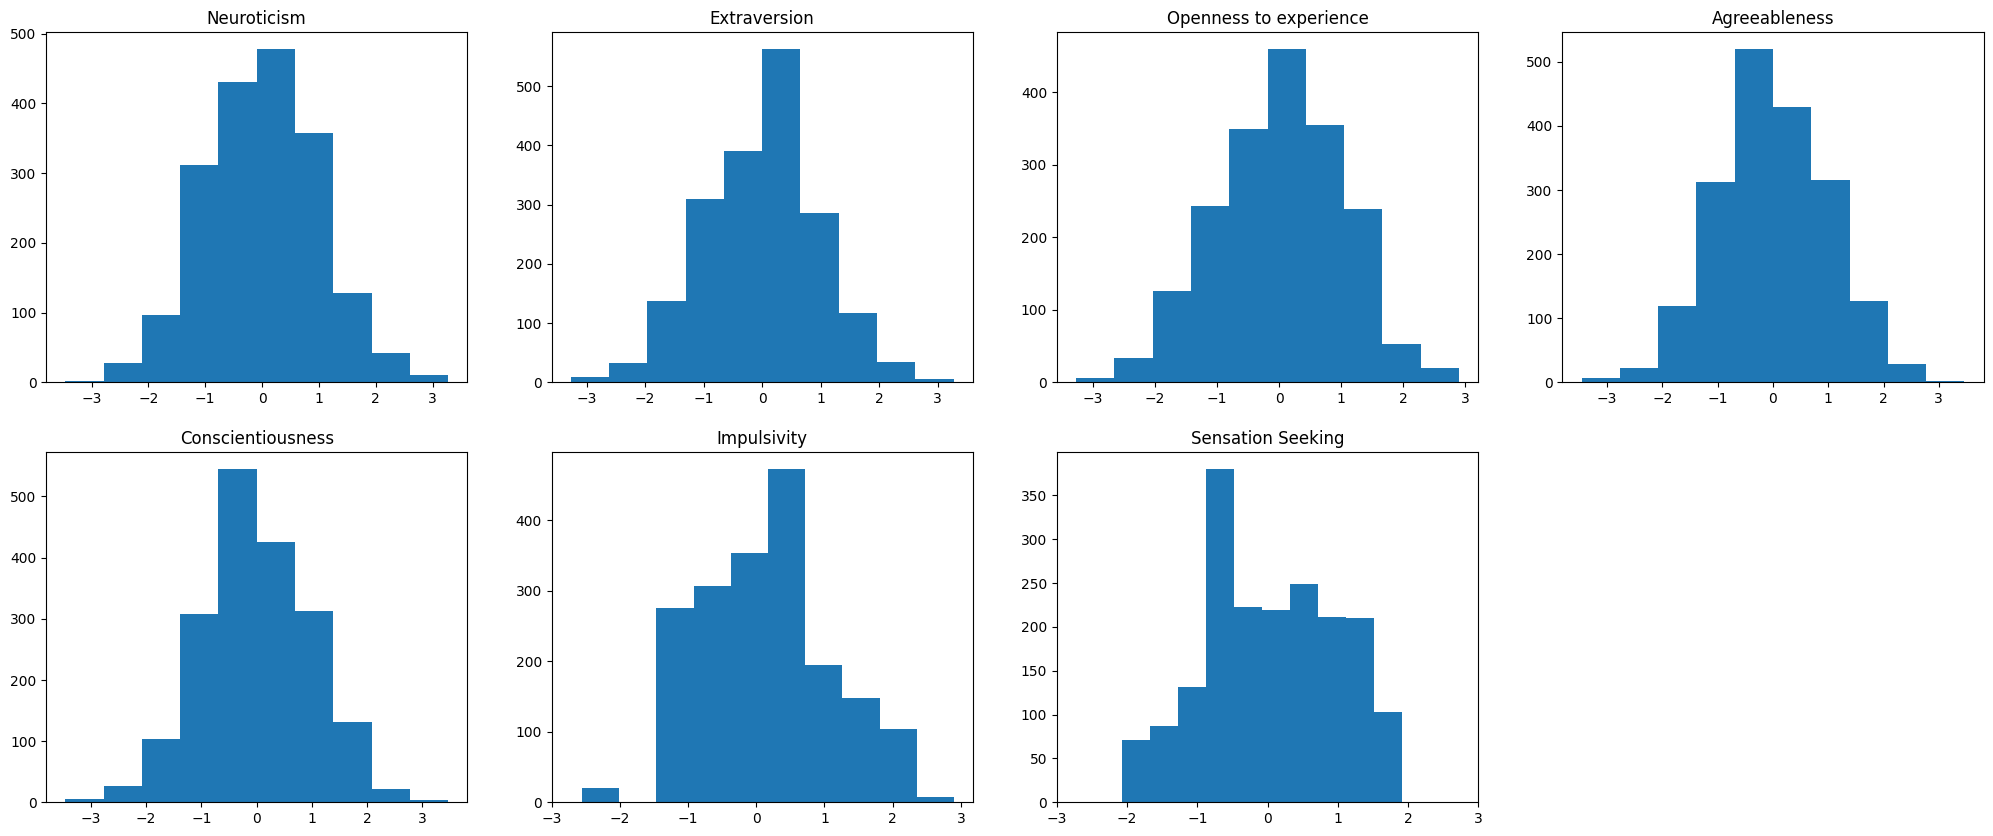

In [112]:
plt.figure(figsize=(25,10))

personality_measures = ['Nscore', 'Escore',	'Oscore',	'AScore',	'Cscore', 'Impulsive', 'SS']#list of personality features
labels = ['Neuroticism', 'Extraversion', 'Openness to experience', 'Agreeableness', 'Conscientiousness', 'Impulsivity', 'Sensation Seeking']
for i in range(len(personality_measures)):
  plt.subplot(2,4
              ,i+1)
  plt.hist(df[personality_measures[i]])
  plt.xticks(np.arange(-3, 4, step=1))  # Set label locations.
  plt.title(labels[i])

plt.show()

In [113]:
df['SS'].describe()

count    1884.000000
mean       -0.002667
std         0.963575
min        -2.078480
25%        -0.525930
50%         0.079870
75%         0.765400
max         1.921730
Name: SS, dtype: float64

###Target drug use

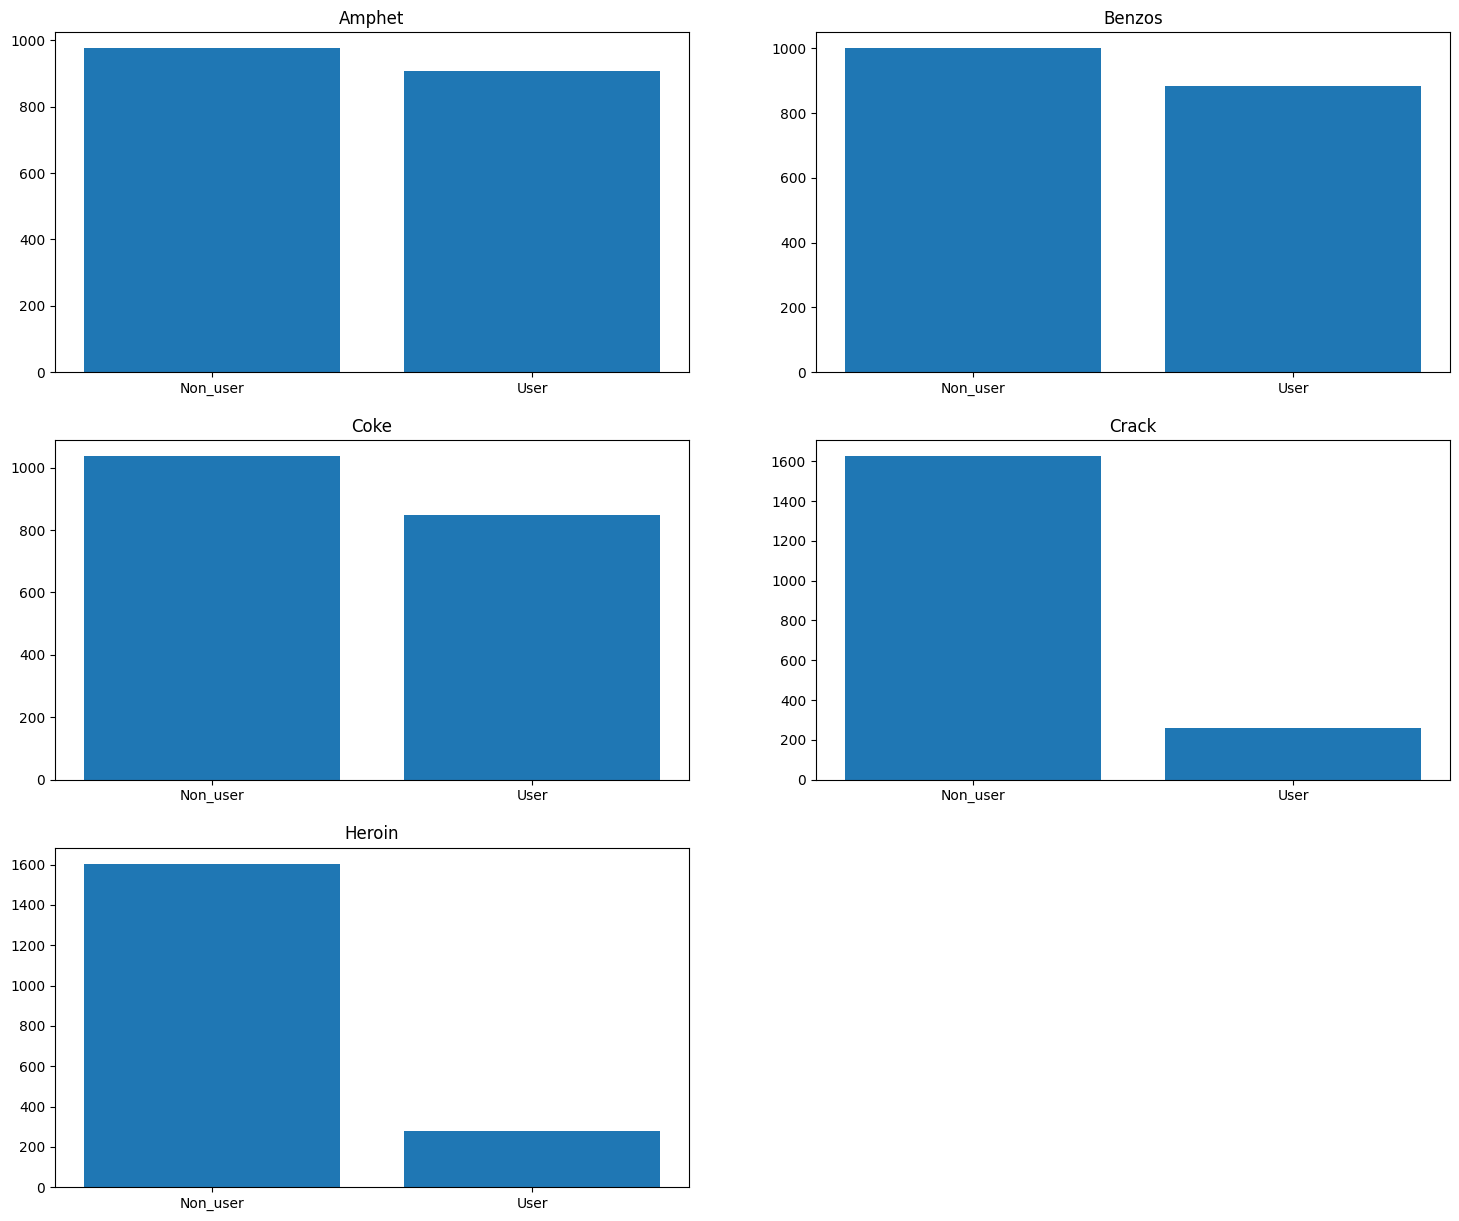

In [114]:
plt.figure(figsize=(18,15))

target_drugs = ['Amphet', 'Benzos', 'Coke', 'Crack', 'Heroin']#list of target features

for i in range(len(target_drugs)):
  var = target_drugs[i]
  plt.subplot(3,2, i+1)
  plt.bar(df.groupby(var)[var].count().index,
          df.groupby(var)[var].count())
  plt.xticks(ticks = [0,1], labels = ['Non_user', 'User'])
  plt.title(target_drugs[i])


plt.show()

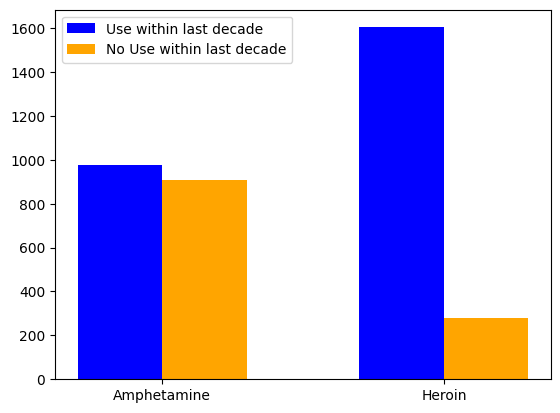

In [115]:
amph = list(df['Amphet'].value_counts())
h = list(df['Heroin'].value_counts())
User = (amph[1], h[1])
NonUser = (amph[0], h[0])
N=2
ind = np.arange(N)
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(ind, NonUser, width, color = 'b', label = 'Use within last decade')
rects2 = ax.bar(ind + width, User, width, color='orange', label = 'No Use within last decade')
plt.xticks(ind + width / 2, ('Amphetamine', 'Heroin'))
plt.legend()
plt.show()

In [116]:
df['Heroin'].value_counts()

0    1604
1     280
Name: Heroin, dtype: int64

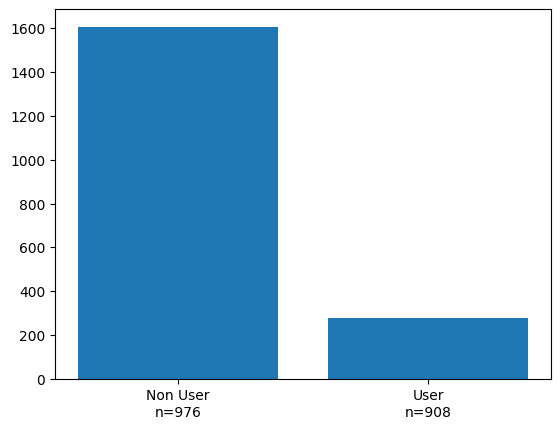

In [117]:

var = 'Heroin'
plt.bar(df.groupby(var)[var].count().index,
          df.groupby(var)[var].count())
plt.xticks(ticks = [0,1], labels = ['Non User\nn=976', 'User\nn=908'])

plt.show()

# Multivariate Analysis

###Demographics and drug use

Age



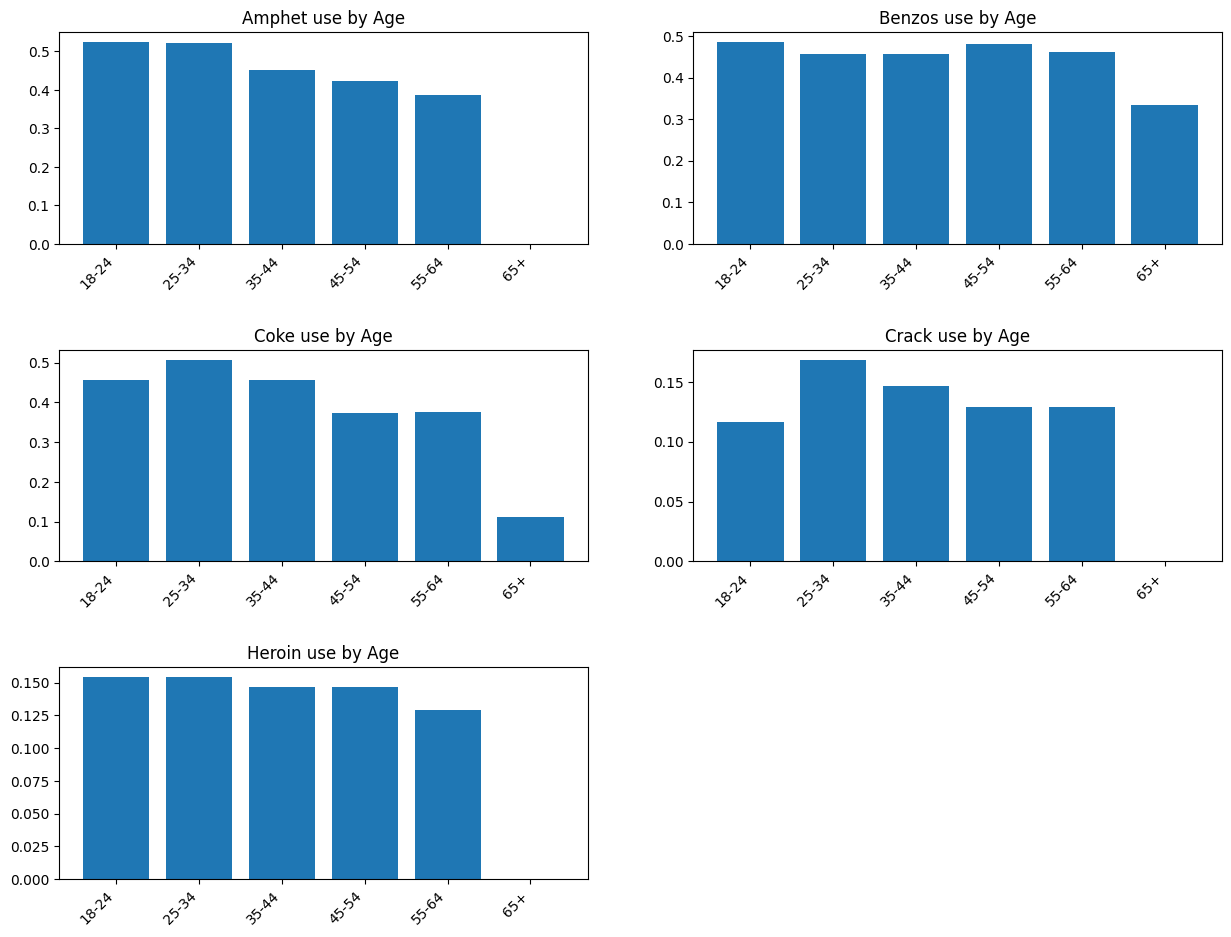

Gender



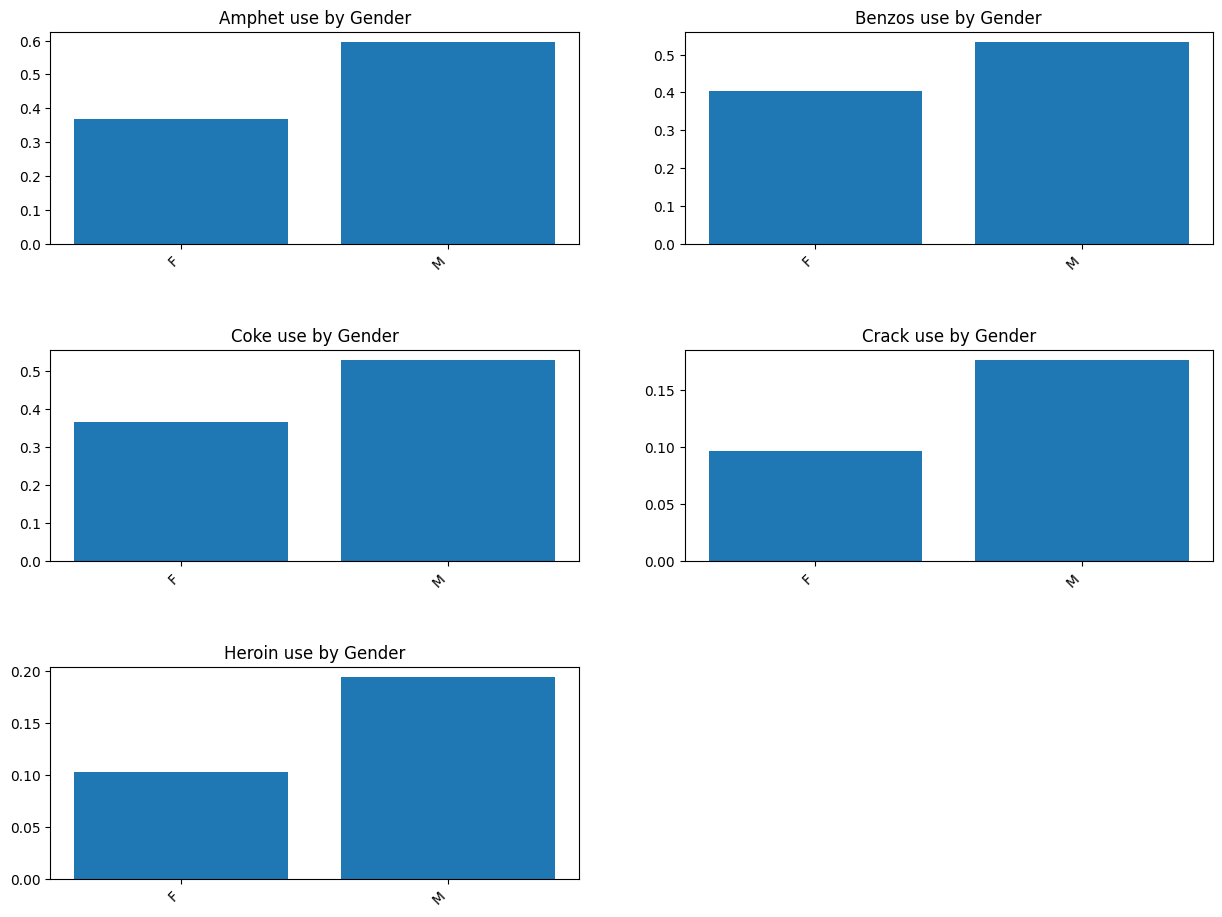

Education



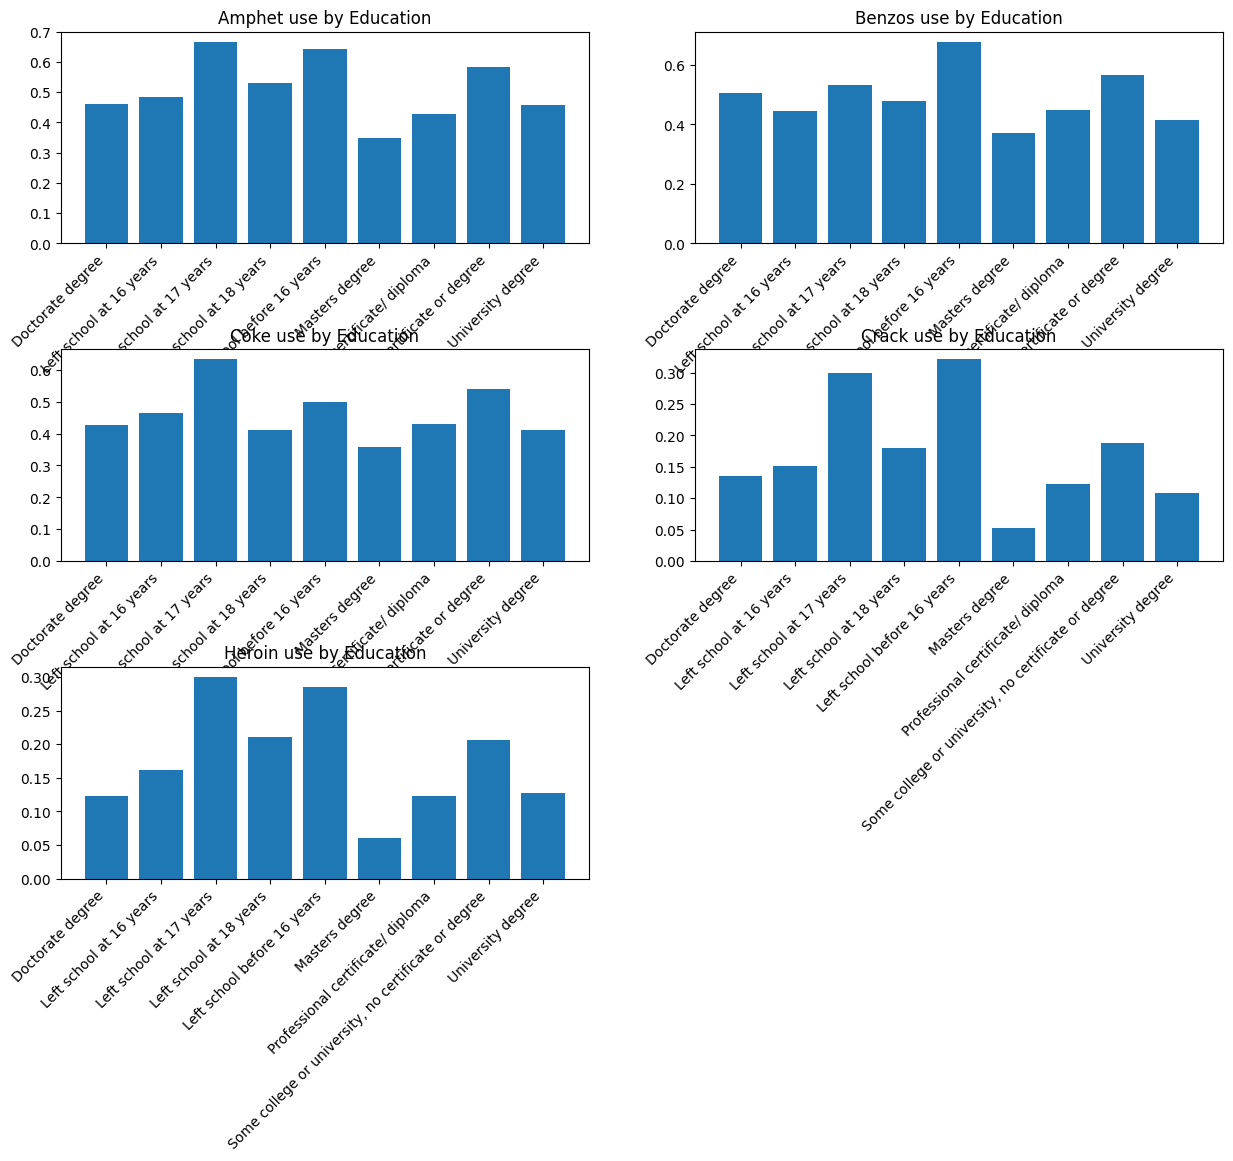

Country



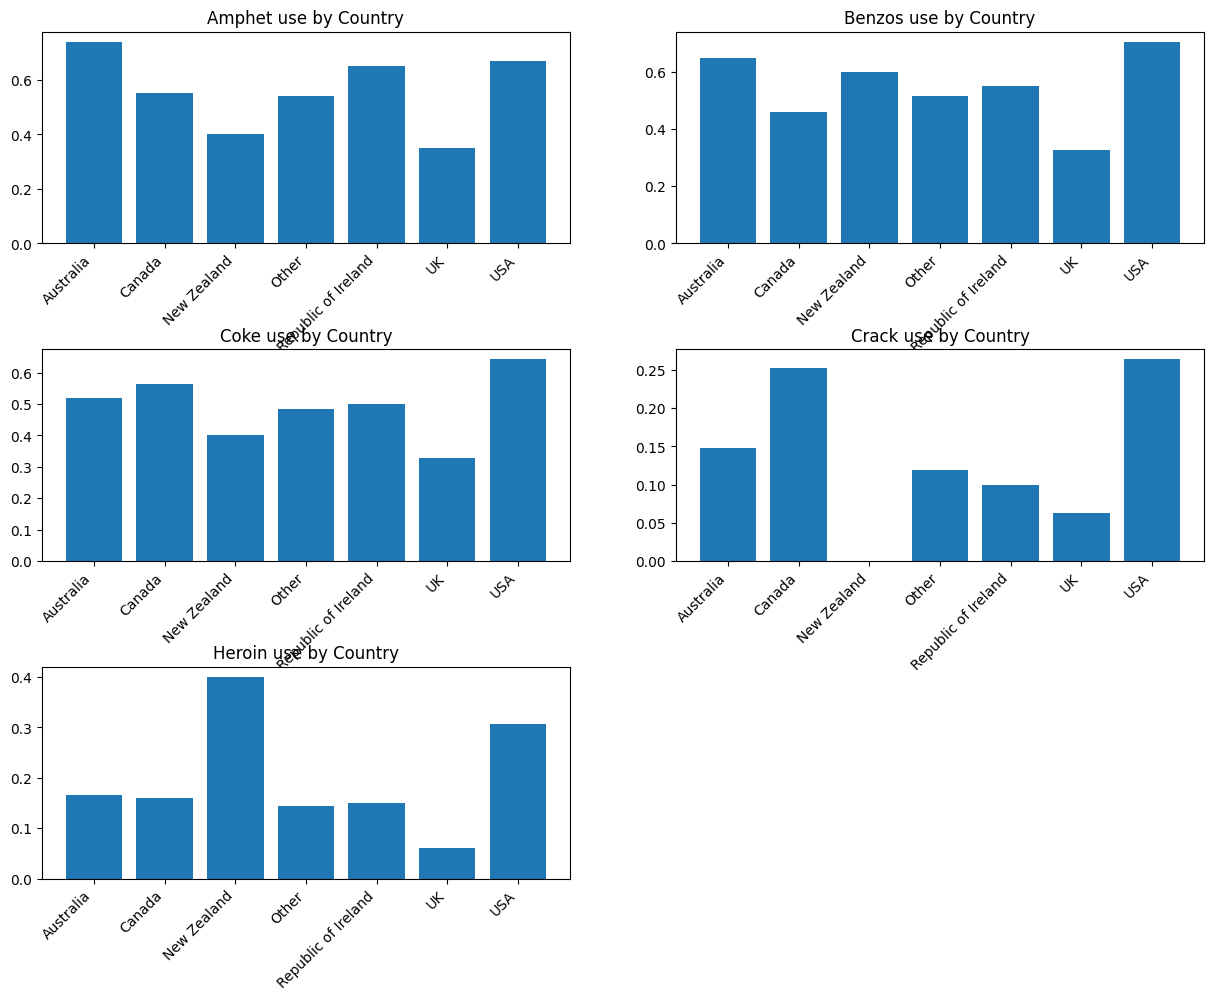

Ethnicity



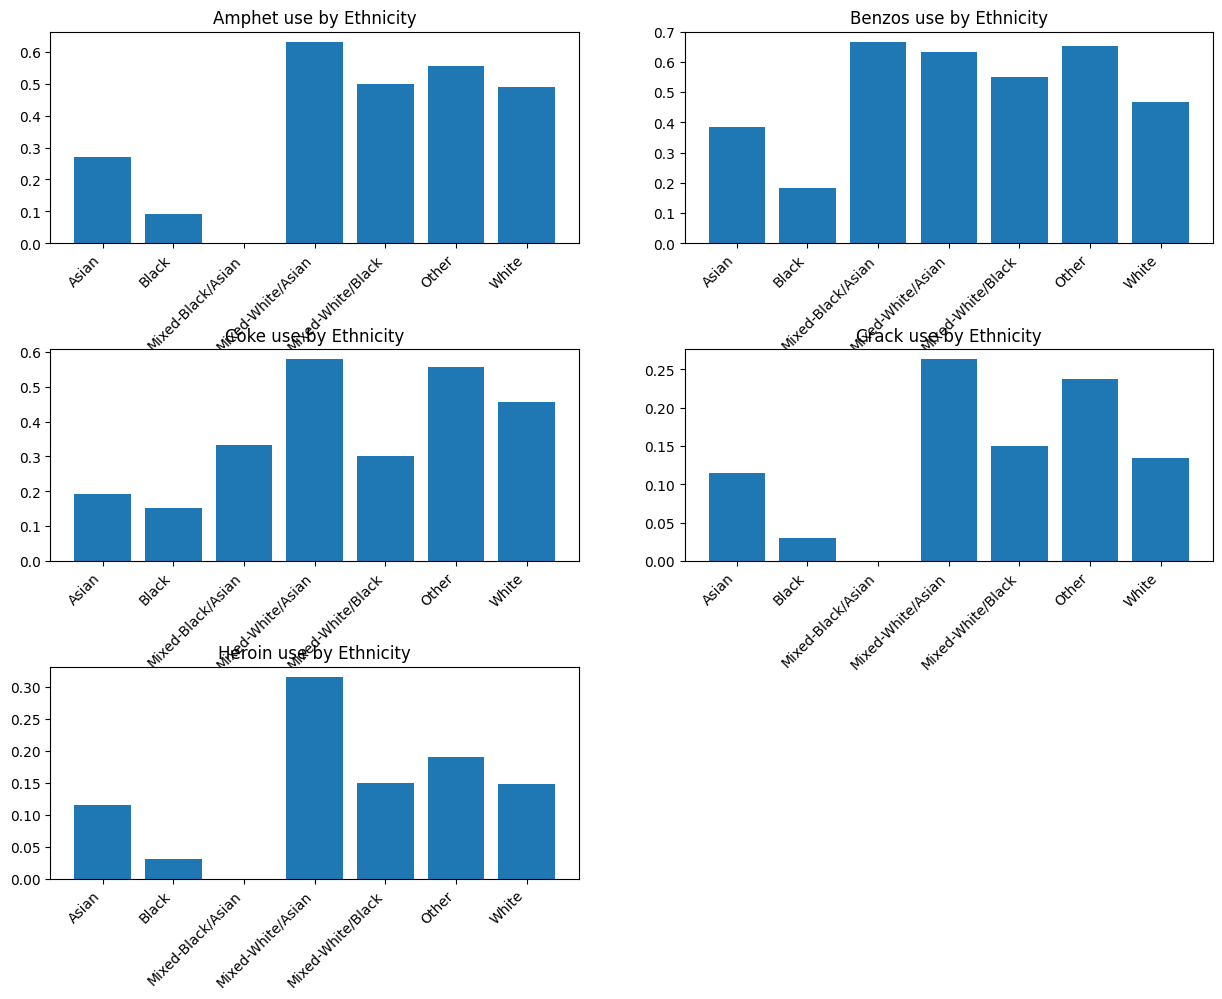

In [118]:
demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
target_drugs = ['Amphet', 'Benzos', 'Coke', 'Crack', 'Heroin']



for i in range(len(demographics)):
  print(demographics[i] + '\n')
  data = df.groupby(demographics[i])
  plt.figure(figsize=(15,11))
  plt.subplots_adjust(hspace=0.5)

  for j in range(len(target_drugs)):
    plt.subplot(3 ,2, (j+1))
    plt.bar(data[target_drugs[j]].mean().index, data[target_drugs[j]].mean())
    plt.xticks(rotation=45, ha='right')
    plt.title('{} use by {}'.format(target_drugs[j], demographics[i]))
  plt.show()




In [151]:
keys = ['Nscore', 'Escore',	'Oscore',	'AScore',	'Cscore', 'Impulsive', 'SS']
values = ['Neuroticism', 'Extraversion', 'Openness to experience', 'Agreeableness', 'Conscientiousness', 'Impulsivity', 'Sensation Seeking']
personality_dict = dict(map(lambda i,j : (i,j) , keys,values))
amphet_df = df.rename(columns=personality_dict).rename(columns={'Amphet':'Use of Amphetamines'})[values + ['Use of Amphetamines']];


<Axes: >

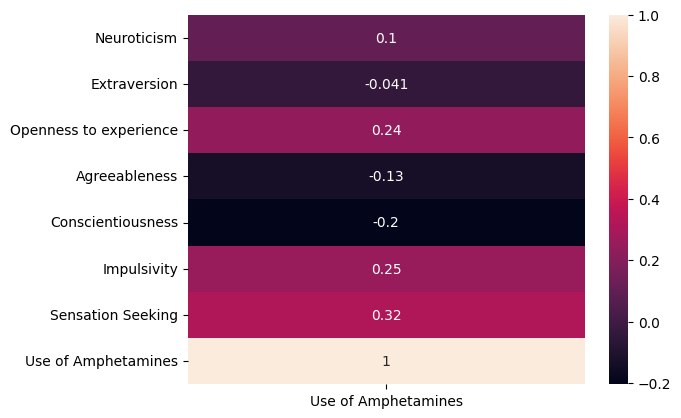

In [153]:
sns.heatmap(amphet_df.corr()[['Use of Amphetamines']], annot=True)

###Personality and drug use

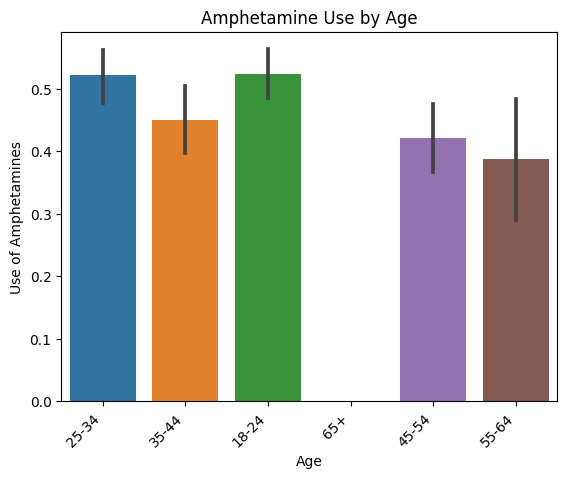

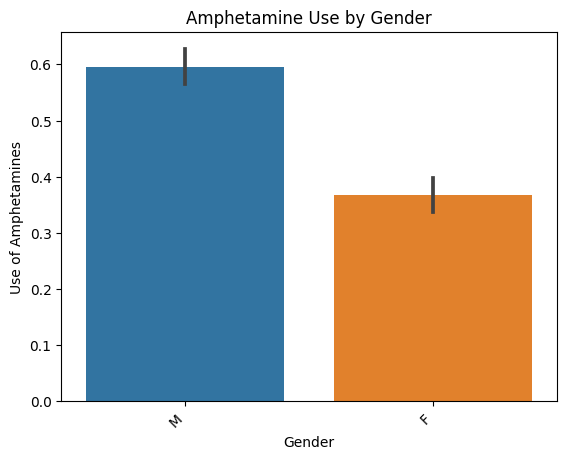

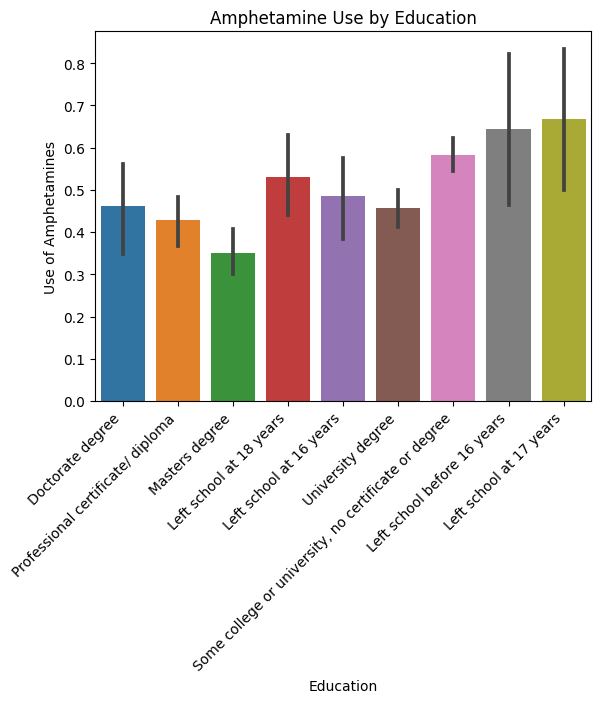

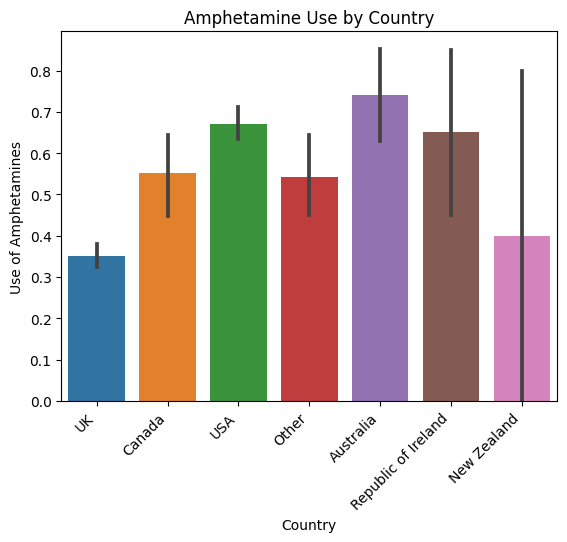

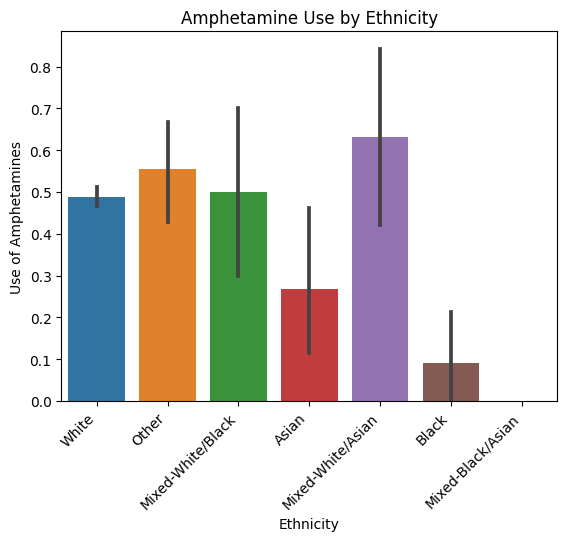

In [162]:
amphetamines_df = df.rename(columns=personality_dict).rename(columns={'Amphet':'Use of Amphetamines'})
demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
for i in range(len(demographics)):
  sns.barplot(data = amphetamines_df, x = demographics[i], y= 'Use of Amphetamines')
  plt.title('Amphetamine Use by {}'.format(demographics[i]))
  plt.xticks(rotation=45, ha='right')
  plt.show()


In [ ]:
demographics
for i in range(len(demographics)):


# Supervised Learning

-Begin with logistic regression: 5 separate models, 1 for each target feature

##Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report


In [124]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

###Amphetamines

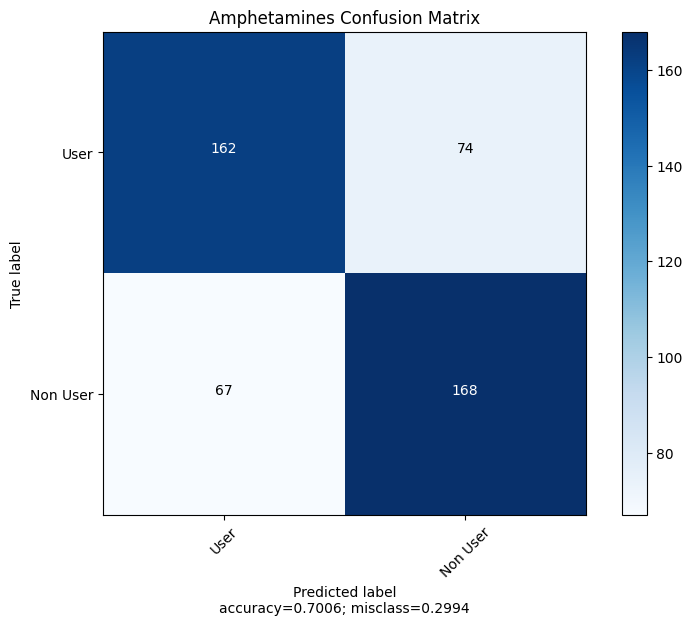

dummy score:
0.4989384288747346.
model accuracy:
0.7006369426751592
precision score:
0.7074235807860262
recall:
0.6864406779661016


In [125]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_amphet = df['Amphet']

X_train, X_test, y_train, y_test = train_test_split(X, y_amphet)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Amphetamines Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))

##Benzodiazepines

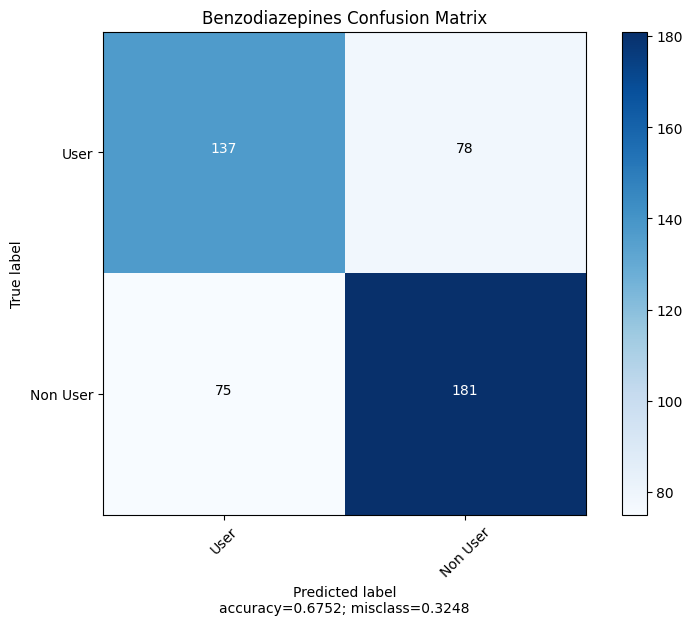

dummy score:
0.5435244161358811.
model accuracy:
0.6751592356687898
precision score:
0.6462264150943396
recall:
0.6372093023255814


In [126]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_benzos = df['Benzos']

X_train, X_test, y_train, y_test = train_test_split(X, y_benzos)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Benzodiazepines Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))


##Cocaine

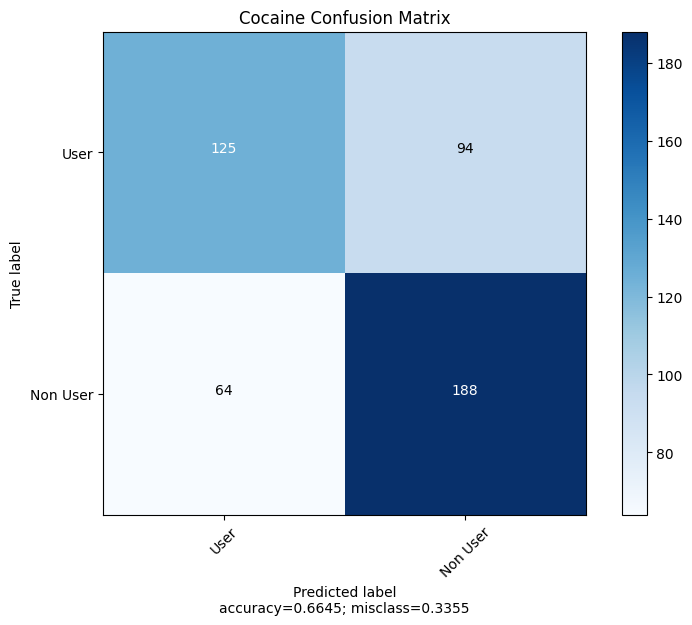

dummy score:
0.535031847133758.
model accuracy:
0.6645435244161358
precision score:
0.6613756613756614
recall:
0.5707762557077626


In [127]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_coke = df['Coke']

X_train, X_test, y_train, y_test = train_test_split(X, y_coke)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Cocaine Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))


###Crack cocaine

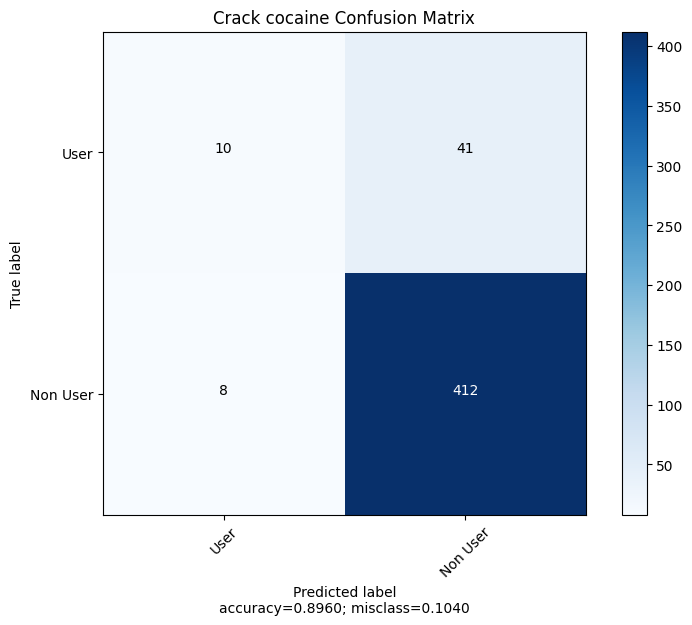

dummy score:
0.89171974522293.
model accuracy:
0.8959660297239915
precision score:
0.5555555555555556
recall:
0.19607843137254902


In [128]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_crack = df['Crack']

X_train, X_test, y_train, y_test = train_test_split(X, y_crack)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Crack cocaine Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))


###Heroin

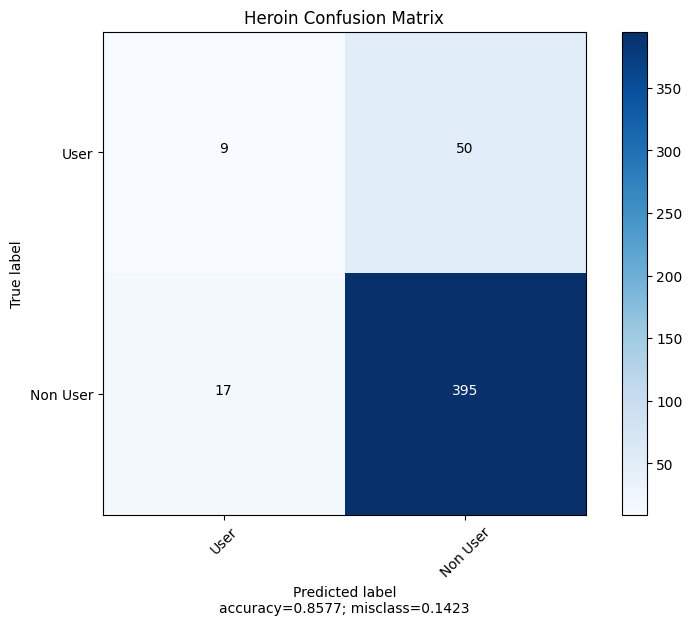

dummy score:
0.8747346072186837.
model accuracy:
0.8577494692144374
precision score:
0.34615384615384615
recall:
0.15254237288135594


In [129]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_heroin = df['Heroin']

X_train, X_test, y_train, y_test = train_test_split(X, y_heroin)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Heroin Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))


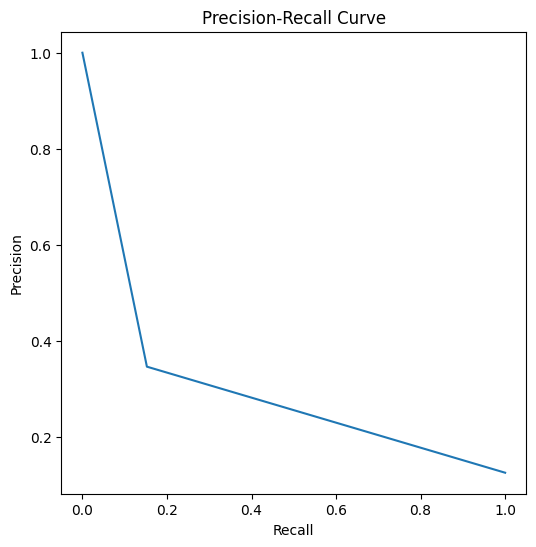

In [130]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#Model Comparisons - Amphetamines and Heroin Use

##Comparison of Logistic Regression and Random Forest for predicting use of amphetamines and heroin


-To limit analysis to a digestible scope, take a closer look at the targets with the most balanced classes (amphetamines) and least balanced (classes). Compare performance of two algorithms - logistic regression and random forest

#Amphetamines

###Logistic Regression

In [131]:
# Find best hyperparameters for logistic regression (f2_beta)

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Amphet']
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

from sklearn.metrics import fbeta_score, make_scorer

#Because classes are balanced, use accuracy score

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring=accuracy_score, cv=cv,error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.000000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) wit

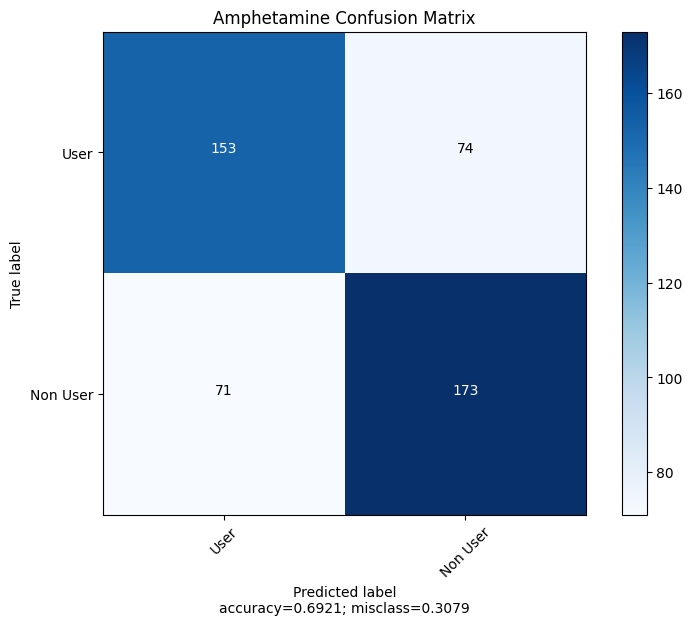

dummy score:
0.5180467091295117.
model accuracy:
0.692144373673036
precision score:
0.6830357142857143
recall:
0.6740088105726872


In [132]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Amphet']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

params = list(grid_result.best_params_.values())

lr = LogisticRegression(C = params[0], penalty=params[1], solver=params[2], random_state=1)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

amphet_lr_report = classification_report(y_test, predictions, target_names=['User', 'Non_user'])

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Amphetamine Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))

###Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

param_dist = {'n_estimators': list(range(10,500)),
              'max_depth': list(range(1,20))}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, 32, 33,
                                                         34, 35, 36, 37, 38, 39, ...]})

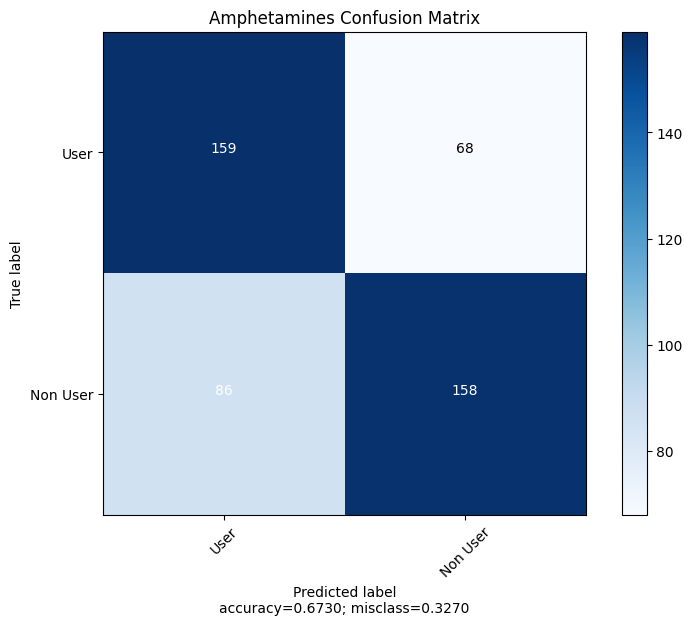

dummy score:
0.5180467091295117.
model accuracy:
0.673036093418259
precision score:
0.6489795918367347
recall:
0.7004405286343612


In [134]:
predictions = rand_search.predict(X_test)

rf_score = rand_search.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)


amphet_rf_report = classification_report(y_test, predictions, target_names=['User', 'Non_user'])


confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Amphetamines Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(rf_score, precision, recall))

#Heroin

###Logistic Regression

In [135]:
# Tuning hyperparameters for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Heroin']
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

from sklearn.metrics import fbeta_score, make_scorer

#class imbalance - to favor recall, use f2 score
ftwo_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring=ftwo_scorer, cv=cv,error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.165147 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.165147 (0.053609) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.163918 (0.052131) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.165147 (0.053609) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.160093 (0.052724) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.160093 (0.052724) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.161466 (0.053445) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.155867 (0.055868) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.155867 (0.055868) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.152032 (0.046943) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.097960 (0.053263) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.097960 (0.053263) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.098064 (0.054364) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.021945 (0.027047) wit

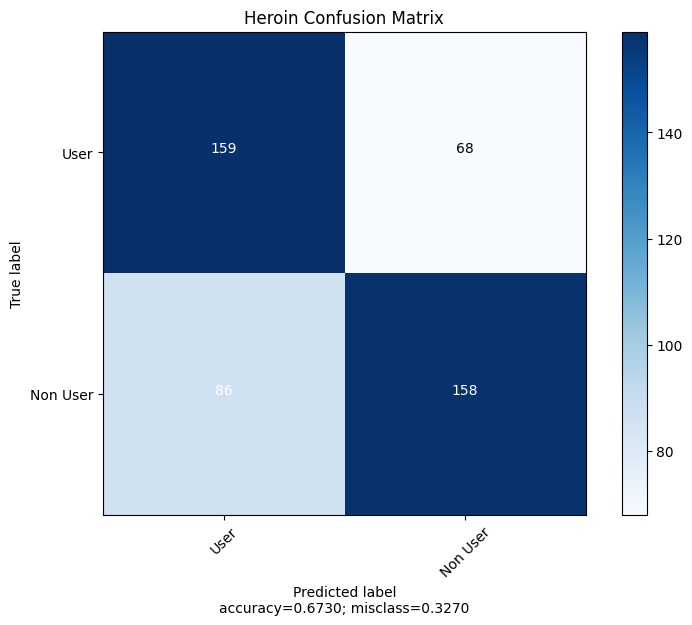

dummy score:
0.5180467091295117.
model accuracy:
0.8683651804670913
precision score:
0.4666666666666667
recall:
0.23333333333333334
f2 score:
0.8683651804670913


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression(solver = 'newton-cg', C = 100, penalty='l2')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

h_lr_score = lr.score(X_test, y_test)
h_lr_recall = recall_score(y_test, predictions)
h_lr_precision = precision_score(y_test, predictions)
h_lr_weighted = fbeta_score(y_test, predictions, average='micro', beta=2)
heroin_lr_report = classification_report(y_test, predictions, target_names=['User', 'Non_user'])

heroin_f2_lr ={}
heroin_f2_lr['macro'] = fbeta_score(y_test, predictions, average='macro', beta=2)
heroin_f2_lr['micro'] = fbeta_score(y_test, predictions, average='micro', beta=2)
heroin_f2_lr['weighted'] = fbeta_score(y_test, predictions, average='micro', beta=2)



heroin_lr_confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Heroin Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}\nf2 score:\n{}'.format(h_lr_score, h_lr_precision, h_lr_recall, h_lr_weighted))

###Random Forest

In [ ]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_heroin = df['Heroin']

X_train, X_test, y_train, y_test = train_test_split(X, y_heroin)

param_dist = {'n_estimators': list(range(10,500)),
              'max_depth': list(range(1,20))}

# Create a random forest classifier
rf = RandomForestClassifier()

from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

param_dist = {'n_estimators': list(range(10,500)),
              'max_depth': list(range(1,20))}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5,
                                 scoring = ftwo_scorer)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

predictions = rand_search.predict(X_test)

h_rf_accuracy = accuracy_score(y_test, predictions)
h_rf_recall = recall_score(y_test, predictions)
h_rf_precision = precision_score(y_test, predictions)

h_rf_f2_weighted = fbeta_score(y_test, predictions, average='micro', beta=2)




heroin_rf_confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Heroin Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}\nf2:\n{}'.format(h_rf_accuracy, h_rf_precision, h_rf_recall, h_rf_f2_weighted))


#Model Comparison - Conclusions

###Amphetamines

In [ ]:
print('Logistic Regression for Amphetamine Use:\n{}'.format(amphet_lr_report))
print('Random Forest for Amphetamine Use:\n{}'.format(amphet_rf_report))

Logistic Regression and Random Forest perform similarly well in binary classification for amphetamine use. Dummy scores for amphetamine are roughly 0.5, indicating a significant improvement for both models over baseline.

###Heroin

In [ ]:
print(plot_confusion_matrix(cm = heroin_lr_confusion, target_names = ['User', 'Non User'], title = 'Heroin Logistic Regression Confusion Matrix', normalize = False))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}\nf2 score:\n{}'.format(h_lr_score, h_lr_precision, h_lr_recall, h_lr_weighted))






In [ ]:
print(plot_confusion_matrix(cm = heroin_rf_confusion, target_names = ['User', 'Non User'], title = 'Heroin Random Forest Confusion Matrix', normalize = False))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}\nf2:\n{}'.format(h_rf_accuracy, h_rf_precision, h_rf_recall, h_rf_f2_weighted))

For binary classificatin of heroin use, logistic regression tends significantly outperforms random forest at recall. f2 score and overall accuracy are comparable. However, given that the frequency of heroin users is 0.149, logistic regression's recall score of roughly 0.155 suggests only a modest performance above chance.